# Анализ дорожно-транспортных проишествий по Кировской и Московской областям

- Автор: Юрий Кузнецов

- Дата: 10.03.2025


Заказчик проекта — «Карта ДТП». Это некоммерческий проект, посвящённый проблеме дорожно-транспортных происшествий в России. Цель проекта — повысить безопасность на дорогах.

«Карта ДТП» помогает выявлять реальные причины ДТП, оценивать уровень развития инфраструктуры, а также разрабатывать качественные решения и программы по повышению безопасности на улицах и дорогах. Заказчик хочет собирать данные более высокого качества и ожидает от вас рекомендаций: на какие проблемы или особенности обратить внимание.

## Что нужно сделать

Проверить, встречаются ли в данных дубликаты и пропуски. Это поможет заказчикам собирать более качественные данные.

Ответить на следующие вопросы:

- как менялось число ДТП по временным промежуткам;

- различается ли число ДТП для групп водителей с разным стажем.


## Описание данных

Данные `Kirovskaya_oblast.csv`, `Moscowskaya_oblast.csv` содержат информацию ДТП:

* `geometry.coordinates` — координаты ДТП;

* `id` — идентификатор ДТП;

*  `properties.tags` — тег происшествия;

*  `properties.light` — освещённость;

*  `properties.point.lat` — широта;

*  `properties.point.long` — долгота;

*  `properties.nearby` — ближайшие объекты;

*  `properties.region` — регион;

*  `properties.scheme` — схема ДТП;

*  `properties.address` — ближайший адрес;

*  `properties.weather` — погода;

*  `properties.category` — категория ДТП;

*  `properties.datetime` — дата и время ДТП;

*  `properties.injured_count` — число пострадавших;

*  `properties.parent_region` — область;

*  `properties.road_conditions` — состояние покрытия;

*  `properties.participants_count` — число участников;

*  `properties.participant_categories` — категории участников.

`Moscowskaya_oblast_participiants.csv`, `Kirovskaya_oblast_participiants.csv` — сведения об участниках ДТП:

* `role` — роль;

* `gender` — пол;

* `violations` — какие правила дорожного движения были нарушены конкретным участником;

* `health_status` — состояние здоровья после  ДТП;

* `years_of_driving_experience` — число лет опыта;

* `id` — идентификатор ДТП.


`Kirovskaya_oblast_vehicles.csv`, `Moscowskaya_oblast_vehicles.csv` — сведения о транспортных средствах:

* `year` — год выпуска;

* `brand` — марка транспортного средства;

* `color` — цвет;

* `model` — модель;

* `category` — категория;

* `id` — идентификатор ДТП.

## Загрузка библиотек и данных


In [1]:
 !pip install phik 


Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from phik import phik_matrix

### Датасет с информацией о ДТП по Кировской области

In [3]:
df_dtp_info_k = pd.read_csv('https://code.s3.yandex.net/datasets/Kirovskaya_oblast.csv')

In [4]:
df_dtp_info_k.head()

,geometry.coordinates,id,properties.tags,properties.light,properties.point.lat,properties.point.long,properties.nearby,properties.region,properties.scheme,properties.address,properties.weather,properties.category,properties.datetime,properties.injured_count,properties.parent_region,properties.road_conditions,properties.participants_count,properties.participant_categories
0,"[47.875603, 57.24379]",1983180,Дорожно-транспортные происшествия,Светлое время суток,57.243790,47.875603,[],Яранский район,600.0,Р-176 Вятка Чебоксары - Йошкар-Ола - Киров - С...,['Дождь'],Опрокидывание,2017-07-01 18:00:00,1,Кировская область,['Мокрое'],3,['Все участники']
1,"[47.87903, 57.304807]",2889433,Дорожно-транспортные происшествия,Светлое время суток,57.304807,47.879030,"['Административные здания', 'Нерегулируемый пе...",Яранский район,710.0,"г Яранск, ул Кирова, 10",['Ясно'],Наезд на пешехода,2023-09-12 17:10:00,1,Кировская область,"['Сухое', 'Отсутствие, плохая различимость гор...",2,"['Все участники', 'Пешеходы']"
2,"[47.840781, 57.297156]",2591208,Дорожно-транспортные происшествия,Сумерки,57.297156,47.840781,"['Жилые дома индивидуальной застройки', 'Нерег...",Яранский район,NaN,"г Яранск, ул Чапаева, 80",['Пасмурно'],Съезд с дороги,2021-07-02 21:25:00,1,Кировская область,['Мокрое'],1,['Все участники']
3,"[47.834365, 57.244775]",2577639,Дорожно-транспортные происшествия,Светлое время суток,57.244775,47.834365,['Жилые дома индивидуальной застройки'],Яранский район,200.0,"м Знаменка, ул Кирова, 15",['Пасмурно'],Столкновение,2021-05-31 18:55:00,1,Кировская область,['Сухое'],2,"['Все участники', 'Мотоциклисты']"
4,"[47.968197, 57.357738]",1981026,Дорожно-транспортные происшествия,Светлое время суток,57.357738,47.968197,['Нерегулируемый перекрёсток неравнозначных ул...,Яранский район,NaN,"с/п Никольское, Киров-Советск- Яранск - подъез...",['Ясно'],Опрокидывание,2018-05-16 16:25:00,2,Кировская область,"['Сухое', 'Отсутствие, плохая различимость гор...",2,['Все участники']


#### Оптимизация назаваний столбцов 


In [5]:
df_dtp_info_k.columns = [c.replace('properties.', '') for c in df_dtp_info_k.columns]
df_dtp_info_k.columns = [c.replace('.', '_') for c in df_dtp_info_k.columns]

In [6]:
df_dtp_info_k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14517 entries, 0 to 14516
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   geometry_coordinates    14517 non-null  object 
 1   id                      14517 non-null  int64  
 2   tags                    14517 non-null  object 
 3   light                   14517 non-null  object 
 4   point_lat               14485 non-null  float64
 5   point_long              14485 non-null  float64
 6   nearby                  14517 non-null  object 
 7   region                  14517 non-null  object 
 8   scheme                  13380 non-null  float64
 9   address                 13843 non-null  object 
 10  weather                 14517 non-null  object 
 11  category                14517 non-null  object 
 12  datetime                14517 non-null  object 
 13  injured_count           14517 non-null  int64  
 14  parent_region           14517 non-null

df_dtp_info_k содержит 14517 строк в 18 столбцах

### Датасет с информацией о ДТП по Московской области


In [7]:
df_dtp_info_m = pd.read_csv('https://code.s3.yandex.net/datasets/Moscowskaya_oblast.csv')

In [8]:
df_dtp_info_m.head()

,geometry.coordinates,id,properties.tags,properties.light,properties.point.lat,properties.point.long,properties.nearby,properties.region,properties.scheme,properties.address,properties.weather,properties.category,properties.datetime,properties.injured_count,properties.parent_region,properties.road_conditions,properties.participants_count,properties.participant_categories
0,"[37.5253, 55.9992]",2163589,['Дорожно-транспортные происшествия'],Светлое время суток,55.999200,37.525300,"['Мост, эстакада, путепровод', 'Крупный торгов...",Мытищинский,NaN,"ХЛЕБНИКОВО-РОГАЧЕВО, 0 км",['Ясно'],Столкновение,2019-01-31 09:05:00,1,Московская область,"['Мокрое', 'Отсутствие, плохая различимость го...",3,['Все участники']
1,"[37.058966, 55.788688]",2155398,"['Дорожно-транспортные происшествия', 'ДТП и п...","В темное время суток, освещение включено",55.788688,37.058966,[],Истринский,70.0,М-9 Балтия Москва - Волоколамск - граница с Ла...,['Ясно'],Столкновение,2018-09-22 05:00:00,2,Московская область,['Сухое'],4,"['Все участники', 'Дети']"
2,"[37.4419, 56.0081]",2163319,['Дорожно-транспортные происшествия'],"В темное время суток, освещение включено",56.008100,37.441900,"['Многоквартирные жилые дома', 'Остановка обще...",Лобня,820.0,"г Лобня, ул Ленина, 43",['Пасмурно'],Наезд на пешехода,2019-01-24 19:30:00,1,Московская область,['Обработанное противогололедными материалами'],2,"['Все участники', 'Пешеходы']"
3,"[38.6614, 55.4358]",2143938,['Дорожно-транспортные происшествия'],Светлое время суток,55.435800,38.661400,['Регулируемый перекресток'],Воскресенский,300.0,ЖУКОВСКИЙ-РАМЕНСКОЕ-СТ.БРОННИЦЫ-ЧЕЧЕВИЛОВО-МБК...,['Ясно'],Столкновение,2018-01-25 16:00:00,2,Московская область,['Обработанное противогололедными материалами'...,3,['Все участники']
4,"[38.29207, 55.50502]",2163390,['Дорожно-транспортные происшествия'],"В темное время суток, освещение отсутствует",55.505020,38.292070,['Нерегулируемый перекрёсток неравнозначных ул...,Раменский,500.0,"ММК-РАМЕНСКОЕ, 4 км",['Ясно'],Столкновение,2019-01-14 17:40:00,1,Московская область,['Обработанное противогололедными материалами'],2,['Все участники']


 #### Оптимизация назавания столбцов 


In [9]:
df_dtp_info_m.columns = [c.replace('properties.', '') for c in df_dtp_info_m.columns]
df_dtp_info_m.columns = [c.replace('.', '_') for c in df_dtp_info_m.columns]

In [10]:
df_dtp_info_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45618 entries, 0 to 45617
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   geometry_coordinates    45618 non-null  object 
 1   id                      45618 non-null  int64  
 2   tags                    45618 non-null  object 
 3   light                   45618 non-null  object 
 4   point_lat               45615 non-null  float64
 5   point_long              45615 non-null  float64
 6   nearby                  45618 non-null  object 
 7   region                  45618 non-null  object 
 8   scheme                  44235 non-null  float64
 9   address                 43862 non-null  object 
 10  weather                 45618 non-null  object 
 11  category                45618 non-null  object 
 12  datetime                45618 non-null  object 
 13  injured_count           45618 non-null  int64  
 14  parent_region           45618 non-null

df_dtp_info_m содержит 45618 строк в 18 столбцах

### Объединение информации по Кировской и Москоской области в единый датасет 


Объединим df_dtp_info_K и df_dtp_info_M

In [11]:
df_dtp_info = pd.concat([df_dtp_info_k, df_dtp_info_m], axis=0)

In [12]:
df_dtp_info.head()

,geometry_coordinates,id,tags,light,point_lat,point_long,nearby,region,scheme,address,weather,category,datetime,injured_count,parent_region,road_conditions,participants_count,participant_categories
0,"[47.875603, 57.24379]",1983180,Дорожно-транспортные происшествия,Светлое время суток,57.243790,47.875603,[],Яранский район,600.0,Р-176 Вятка Чебоксары - Йошкар-Ола - Киров - С...,['Дождь'],Опрокидывание,2017-07-01 18:00:00,1,Кировская область,['Мокрое'],3,['Все участники']
1,"[47.87903, 57.304807]",2889433,Дорожно-транспортные происшествия,Светлое время суток,57.304807,47.879030,"['Административные здания', 'Нерегулируемый пе...",Яранский район,710.0,"г Яранск, ул Кирова, 10",['Ясно'],Наезд на пешехода,2023-09-12 17:10:00,1,Кировская область,"['Сухое', 'Отсутствие, плохая различимость гор...",2,"['Все участники', 'Пешеходы']"
2,"[47.840781, 57.297156]",2591208,Дорожно-транспортные происшествия,Сумерки,57.297156,47.840781,"['Жилые дома индивидуальной застройки', 'Нерег...",Яранский район,NaN,"г Яранск, ул Чапаева, 80",['Пасмурно'],Съезд с дороги,2021-07-02 21:25:00,1,Кировская область,['Мокрое'],1,['Все участники']
3,"[47.834365, 57.244775]",2577639,Дорожно-транспортные происшествия,Светлое время суток,57.244775,47.834365,['Жилые дома индивидуальной застройки'],Яранский район,200.0,"м Знаменка, ул Кирова, 15",['Пасмурно'],Столкновение,2021-05-31 18:55:00,1,Кировская область,['Сухое'],2,"['Все участники', 'Мотоциклисты']"
4,"[47.968197, 57.357738]",1981026,Дорожно-транспортные происшествия,Светлое время суток,57.357738,47.968197,['Нерегулируемый перекрёсток неравнозначных ул...,Яранский район,NaN,"с/п Никольское, Киров-Советск- Яранск - подъез...",['Ясно'],Опрокидывание,2018-05-16 16:25:00,2,Кировская область,"['Сухое', 'Отсутствие, плохая различимость гор...",2,['Все участники']


In [13]:
df_dtp_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60135 entries, 0 to 45617
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   geometry_coordinates    60135 non-null  object 
 1   id                      60135 non-null  int64  
 2   tags                    60135 non-null  object 
 3   light                   60135 non-null  object 
 4   point_lat               60100 non-null  float64
 5   point_long              60100 non-null  float64
 6   nearby                  60135 non-null  object 
 7   region                  60135 non-null  object 
 8   scheme                  57615 non-null  float64
 9   address                 57705 non-null  object 
 10  weather                 60135 non-null  object 
 11  category                60135 non-null  object 
 12  datetime                60135 non-null  object 
 13  injured_count           60135 non-null  int64  
 14  parent_region           60135 non-null  obj

Объединенный датасет df_dtp_info содержит 60135 строк в 18 столбцах хранит информацию о ДТП в Киросквой и Московской областях

### Датасет с участниками ДТП в Кировской области

In [15]:
df_dtp_participants_k = pd.read_csv('https://code.s3.yandex.net/datasets/Kirovskaya_oblast_participiants.csv')

In [16]:
df_dtp_participants_k.head()

,role,gender,violations,health_status,years_of_driving_experience,id
0,Водитель,Мужской,['Несоответствие скорости конкретным условиям ...,"Раненый, находящийся (находившийся) на амбулат...",26.0,1983180
1,Водитель,Мужской,[],Не пострадал,34.0,2889433
2,Пассажир,Мужской,[],"Раненый, находящийся (находившийся) на амбула...",NaN,2591208
3,Пассажир,Мужской,[],"Раненый, находящийся (находившийся) на амбула...",NaN,2591208
4,Водитель,Мужской,[],Не пострадал,27.0,2577639


In [17]:
df_dtp_participants_k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31235 entries, 0 to 31234
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   role                         31235 non-null  object 
 1   gender                       30387 non-null  object 
 2   violations                   31235 non-null  object 
 3   health_status                31135 non-null  object 
 4   years_of_driving_experience  16909 non-null  float64
 5   id                           31235 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 1.4+ MB


df_dtp_participants_k 31235 строк в 6 столбцах содержит информацию об участниках в Кировской области

### Датасет с участниками ДТП в Московской области


In [18]:
df_dtp_participants_m = pd.read_csv('https://code.s3.yandex.net/datasets/Moscowskaya_oblast_participiants.csv')

In [19]:
df_dtp_participants_m.head()

,role,gender,violations,health_status,years_of_driving_experience,id
0,Водитель,Мужской,[],Не пострадал,13.0,2163589
1,Водитель,Мужской,[],Не пострадал,13.0,2163589
2,Водитель,Мужской,['Неправильный выбор дистанции'],Не пострадал,5.0,2155398
3,Водитель,Мужской,['Неправильный выбор дистанции'],Не пострадал,5.0,2155398
4,Водитель,Женский,[],Не пострадал,11.0,2163319


In [20]:
df_dtp_participants_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95177 entries, 0 to 95176
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   role                         95177 non-null  object 
 1   gender                       93307 non-null  object 
 2   violations                   95177 non-null  object 
 3   health_status                95070 non-null  object 
 4   years_of_driving_experience  59679 non-null  float64
 5   id                           95177 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 4.4+ MB


df_dtp_participants_M имеет 95177 строк в 6 столбцах содержит информацию об участниках ДТП в Московской области

### Объединение информации об участниках ДТП по Кировкой и Московской области в один датасет 

Объединим  df_dtp_participants_k и df_dtp_participants_m

In [21]:
df_dtp_participants = pd.concat([df_dtp_participants_k, df_dtp_participants_m], axis=0)

In [22]:
df_dtp_participants.head()

,role,gender,violations,health_status,years_of_driving_experience,id
0,Водитель,Мужской,['Несоответствие скорости конкретным условиям ...,"Раненый, находящийся (находившийся) на амбулат...",26.0,1983180
1,Водитель,Мужской,[],Не пострадал,34.0,2889433
2,Пассажир,Мужской,[],"Раненый, находящийся (находившийся) на амбула...",NaN,2591208
3,Пассажир,Мужской,[],"Раненый, находящийся (находившийся) на амбула...",NaN,2591208
4,Водитель,Мужской,[],Не пострадал,27.0,2577639


In [23]:
df_dtp_participants.info()

<class 'pandas.core.frame.DataFrame'>
Index: 126412 entries, 0 to 95176
Data columns (total 6 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   role                         126412 non-null  object 
 1   gender                       123694 non-null  object 
 2   violations                   126412 non-null  object 
 3   health_status                126205 non-null  object 
 4   years_of_driving_experience  76588 non-null   float64
 5   id                           126412 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 6.8+ MB


Общий датасет df_dtp_participants имеет 126412 строк в 6 столбцах содержит информацию об усастниках в Московской и Кировской областях

### Датасет о транспотных средствах учавствовавших в ДТП в Кировской области


In [24]:
df_dtp_vehicles_k = pd.read_csv('https://code.s3.yandex.net/datasets/Kirovskaya_oblast_vehicles.csv')

In [25]:
df_dtp_vehicles_k.head()

,year,brand,color,model,category,id
0,2011.0,ВАЗ,Серый,Kalina,"А-класс (особо малый) до 3,5 м",1983180
1,2005.0,CHEVROLET,Зеленый,Niva,"С-класс (малый средний, компактный) до 4,3 м",2889433
2,2017.0,RENAULT,Синий,Logan,"С-класс (малый средний, компактный) до 4,3 м",2591208
3,2006.0,ВАЗ,Зеленый,ВАЗ 2115 и модификации,"С-класс (малый средний, компактный) до 4,3 м",2577639
4,1986.0,MERCEDES,Зеленый,Прочие модели Mercedes,Фургоны,1981026


In [26]:
df_dtp_vehicles_k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20093 entries, 0 to 20092
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      19299 non-null  float64
 1   brand     19318 non-null  object 
 2   color     19643 non-null  object 
 3   model     19318 non-null  object 
 4   category  20093 non-null  object 
 5   id        20093 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 942.0+ KB


Датасет по Кировкой области имеет 20093 строки в 6 столбцах содержит информацию о транспортных средствах

### Датасет о транспотных средствах учавствовавших в ДТП в Московской области

In [27]:
df_dtp_vehicles_m = pd.read_csv('https://code.s3.yandex.net/datasets/Moscowskaya_oblast_vehicles.csv')

In [28]:
df_dtp_vehicles_m.head()

,year,brand,color,model,category,id
0,2012.0,ГАЗ,Белый,Прочие модели ГАЗ,Фургоны,2163589
1,2008.0,OPEL,Черный,Astra,"С-класс (малый средний, компактный) до 4,3 м",2155398
2,2017.0,MAZDA,Черный,CX-5,"В-класс (малый) до 3,9 м",2163319
3,2013.0,ГАЗ,Белый,"2705 Газель , 27057 и модификации",Фургоны,2143938
4,2011.0,RENAULT,Синий,Прочие модели Renault,"В-класс (малый) до 3,9 м",2163390


In [29]:
df_dtp_vehicles_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65606 entries, 0 to 65605
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      63860 non-null  float64
 1   brand     64185 non-null  object 
 2   color     64765 non-null  object 
 3   model     64185 non-null  object 
 4   category  65606 non-null  object 
 5   id        65606 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 3.0+ MB


Датасе по Московской области df_dtp_vehicles_m имеет 65606 строк в 6 столбцах 

### Объединение информации о транспортных средствах, учавствовавших в ДТП в Кировской и Московской области в один датасет

Объединяем df_dtp_vehicles_k и df_dtp_vehicles_m

In [30]:
df_dtp_vehicles = pd.concat([df_dtp_vehicles_k, df_dtp_vehicles_m], axis=0)

In [31]:
df_dtp_vehicles.head()

,year,brand,color,model,category,id
0,2011.0,ВАЗ,Серый,Kalina,"А-класс (особо малый) до 3,5 м",1983180
1,2005.0,CHEVROLET,Зеленый,Niva,"С-класс (малый средний, компактный) до 4,3 м",2889433
2,2017.0,RENAULT,Синий,Logan,"С-класс (малый средний, компактный) до 4,3 м",2591208
3,2006.0,ВАЗ,Зеленый,ВАЗ 2115 и модификации,"С-класс (малый средний, компактный) до 4,3 м",2577639
4,1986.0,MERCEDES,Зеленый,Прочие модели Mercedes,Фургоны,1981026


In [32]:
df_dtp_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85699 entries, 0 to 65605
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      83159 non-null  float64
 1   brand     83503 non-null  object 
 2   color     84408 non-null  object 
 3   model     83503 non-null  object 
 4   category  85699 non-null  object 
 5   id        85699 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 4.6+ MB


Объединенный датасет имеет 85699 строк в 6 столбцах содержит информацию о транстпортных средствах в Кировской и Московской областях

### Сведение информации об объеме объединенных датасетов

In [33]:
tot_sets = pd.DataFrame({'тип': ['ДТП', 'обьем датасета ДПТ', 'Участники', 'обьем датасета Участники', 'Транспорт', 'обьем датасета транспорт'],
                         'Кировская': ['df_dtp_info_k', df_dtp_info_k.shape, 'df_dtp_participants_k', df_dtp_participants_k.shape, 'df_dtp_vehicles_k', df_dtp_vehicles_k.shape ],
                         'Московская': ['df_dtp_info_m', df_dtp_info_m.shape, 'df_dtp_participants_m', df_dtp_participants_m.shape, 'df_dtp_vehicles_m', df_dtp_vehicles_m.shape ],
                         'Кировская и Московская': ['df_dtp_info', df_dtp_info.shape, 'df_dtp_participants', df_dtp_participants.shape, 'df_dtp_vehicles', df_dtp_vehicles.shape ],
                        })

tot_sets

,тип,Кировская,Московская,Кировская и Московская
0,ДТП,df_dtp_info_k,df_dtp_info_m,df_dtp_info
1,обьем датасета ДПТ,"(14517, 18)","(45618, 18)","(60135, 18)"
2,Участники,df_dtp_participants_k,df_dtp_participants_m,df_dtp_participants
3,обьем датасета Участники,"(31235, 6)","(95177, 6)","(126412, 6)"
4,Транспорт,df_dtp_vehicles_k,df_dtp_vehicles_m,df_dtp_vehicles
5,обьем датасета транспорт,"(20093, 6)","(65606, 6)","(85699, 6)"


Объемы датасетов отличаются. Очевидно, что в дтп как правило учавствует более одного транспортного средства, а участников может быть еще больше, что и подтверждают данные 


## Проверка ошибок в данных и их предобработка


### Проверка пропусков в данных


#### Пропуски в датасете df_dtp_info с информацией о ДТП

In [34]:
missing = (pd.DataFrame({'Кол-во пропусков': df_dtp_info.isnull().sum(), 'Процент пропусков': round(df_dtp_info.isnull().mean().round(5), 3)*100}).sort_values(by='Кол-во пропусков', ascending=False)
           .style.background_gradient(cmap='coolwarm'))
missing

,Кол-во пропусков,Процент пропусков
scheme,2520,4.200000
address,2430,4.000000
point_lat,35,0.100000
point_long,35,0.100000
category,0,0.000000
participants_count,0,0.000000
road_conditions,0,0.000000
parent_region,0,0.000000
injured_count,0,0.000000
datetime,0,0.000000


Больше всего пропусков в поле scheme не случайно, это связано со спецификой регистрации ДТП: схема ДТП составляется не всегда
Пропуски в поле address также могут быть не случайными, так как ДТП происходят вне пределах города, где нет конкретного адреса
point_lat и point_long, широта и долгота происшествия могут быть случайными или по неизвестным нам причинам

Пропуски в столбцах scheme и address возможно заменить на значение "нет данных"
Пропуски в point_lat и point_long ввиду их малого количества можно оставить, если мы не будем строить геокарту


In [35]:
df_dtp_info[['scheme', 'address']] = df_dtp_info[['scheme', 'address']].fillna('нет данных')

In [36]:
missing = (pd.DataFrame({'Кол-во пропусков': df_dtp_info.isnull().sum(), 'Процент пропусков': round(df_dtp_info.isnull().mean().round(5), 3)*100}).sort_values(by='Кол-во пропусков', ascending=False)
           .style.background_gradient(cmap='coolwarm'))
missing

,Кол-во пропусков,Процент пропусков
point_lat,35,0.100000
point_long,35,0.100000
geometry_coordinates,0,0.000000
weather,0,0.000000
participants_count,0,0.000000
road_conditions,0,0.000000
parent_region,0,0.000000
injured_count,0,0.000000
datetime,0,0.000000
category,0,0.000000


#### Пропуски в датасете df_dtp_participants с информацией об участниках ДТП

In [37]:
missing_p = (pd.DataFrame({'Кол-во пропусков': df_dtp_participants.isnull().sum(), 'Процент пропусков': round(df_dtp_participants.isnull().mean().round(5), 3)*100}).sort_values(by='Кол-во пропусков', ascending=False)
           .style.background_gradient(cmap='coolwarm'))
missing_p

,Кол-во пропусков,Процент пропусков
years_of_driving_experience,49824,39.400000
gender,2718,2.200000
health_status,207,0.200000
role,0,0.000000
violations,0,0.000000
id,0,0.000000


39,4 % пропусков в поле years_of_driving_experience, лет вождения, что модет говорить о водителях с отсутствующим стажем вождения. А может и нет. 
Пол водителя не указан в 2.2 % данных, что является случайным. Предполагается заменить на индикатор "нет данных"
Состояние здоровья не указано в 0.2 %. Что может означать что здоровье осталось в норме после дтп. Однако это лишь предположение. Предполагается заменить на моду


In [38]:
#df_dtp_participants['years_of_driving_experience']=df_dtp_participants['years_of_driving_experience'].fillna(0)
df_dtp_participants['gender']=df_dtp_participants['gender'].fillna('нет данных')
df_dtp_participants['health_status']=df_dtp_participants['health_status'].fillna('Не пострадал')

In [39]:
df_dtp_participants['health_status'].mode()

0    Не пострадал
Name: health_status, dtype: object

In [40]:
missing_p = (pd.DataFrame({'Кол-во пропусков': df_dtp_participants.isnull().sum(), 'Процент пропусков': round(df_dtp_participants.isnull().mean().round(5), 3)*100}).sort_values(by='Кол-во пропусков', ascending=False)
           .style.background_gradient(cmap='coolwarm'))
missing_p

,Кол-во пропусков,Процент пропусков
years_of_driving_experience,49824,39.400000
role,0,0.000000
gender,0,0.000000
violations,0,0.000000
health_status,0,0.000000
id,0,0.000000


Пропуски в столбце years_of_driving_experience оставим как есть. Они по видимому неслучайны, но об их наличии мы ничего не можем сказать на основе имеющихся данных

#### Пропуски в датасете df_dtp_vehicles с информацией о транспортных средствах

In [41]:
missing_v = (pd.DataFrame({'Кол-во пропусков': df_dtp_vehicles.isnull().sum(), 'Процент пропусков': round(df_dtp_vehicles.isnull().mean().round(5), 3)*100}).sort_values(by='Кол-во пропусков', ascending=False)
           .style.background_gradient(cmap='coolwarm'))
missing_v

,Кол-во пропусков,Процент пропусков
year,2540,3.000000
brand,2196,2.600000
model,2196,2.600000
color,1291,1.500000
category,0,0.000000
id,0,0.000000


Обнаруживаются пропуски в полях year 3% brand 2.6% model 2.6% color 1.5 %. Заменим их индикатором "нет данных"

In [42]:
df_dtp_vehicles[['year','brand', 'model', 'color']]=df_dtp_vehicles[['year', 'brand', 'model', 'color']].fillna('нет данных')

In [43]:
missing_v = (pd.DataFrame({'Кол-во пропусков': df_dtp_vehicles.isnull().sum(), 'Процент пропусков': round(df_dtp_vehicles.isnull().mean().round(5), 3)*100}).sort_values(by='Кол-во пропусков', ascending=False)
           .style.background_gradient(cmap='coolwarm'))
missing_v

,Кол-во пропусков,Процент пропусков
year,0,0.000000
brand,0,0.000000
color,0,0.000000
model,0,0.000000
category,0,0.000000
id,0,0.000000


### Наличие явных и неявных дубликатов в данных



Есть ли явные дубликаты в данных, какой это процент значений?

#### Дубликаты в датасете df_dtp_info

In [44]:
# Приведем данные текстовых столбцах df_dtp_info
for column in ['tags', 'light', 'region', 'address', 'weather','category', 'parent_region', 'road_conditions', 'participant_categories']:
    df_dtp_info[column]=df_dtp_info[column].apply(lambda x:x.lower().strip())

In [45]:
df_dtp_info.duplicated().sum()

0

Явных нет

In [46]:
df_dtp_info['id'].duplicated().sum()

0

Все id уникальны, значит неявных тоже нет

#### Дубликаты в датасете df_dtp_participants

In [47]:
# Приведем данные текстовых столбцах df_dtp_info
for column in ['role', 'gender', 'violations', 'health_status']:
    df_dtp_participants[column]=df_dtp_participants[column].apply(lambda x:x.lower().strip())

In [48]:
df_dtp_participants.duplicated().sum()

45155

In [49]:
round(df_dtp_participants.duplicated().sum()/df_dtp_participants.shape[0], 3)*100

35.699999999999996

В датасете years_of_driving_experience обнаружено 35,7 % явных дубикаттов

Явные дубликаты обнаружены
Удалим их

In [50]:
df_dtp_participants = df_dtp_participants.drop_duplicates()


In [51]:
df_dtp_participants.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81257 entries, 0 to 95168
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   role                         81257 non-null  object 
 1   gender                       81257 non-null  object 
 2   violations                   81257 non-null  object 
 3   health_status                81257 non-null  object 
 4   years_of_driving_experience  46295 non-null  float64
 5   id                           81257 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 4.3+ MB


#### Дубликаты в датасете df_dtp_vehicles

In [52]:
# Приведем данные текстовых столбцах df_dtp_vehicles
for column in ['brand', 'color', 'category']:
    df_dtp_vehicles[column]=df_dtp_vehicles[column].apply(lambda x:x.lower().strip())

In [53]:
df_dtp_vehicles.duplicated().sum()

724

In [54]:
round(df_dtp_vehicles.duplicated().sum()/df_dtp_vehicles.shape[0], 4)*100

0.84

Явных дубликатов 0,84 %. Удаляем

In [55]:
df_dtp_vehicles = df_dtp_vehicles.drop_duplicates()

In [56]:
df_dtp_vehicles['id'].duplicated().sum()

33114

id ДТП может повторяться в данном датасете, так как число участников в одном ДТП может быть более 1

Неявные дубликаты

In [57]:
df_dtp_vehicles[['id', 'year', 'brand', 'model', 'color' ]].duplicated().sum()

18

In [58]:
round(df_dtp_vehicles[['id', 'year', 'brand', 'model', 'color' ]].duplicated().sum()/df_dtp_vehicles.shape[0], 8)*100

0.021183

В датасете df_dtp_vehicles обнаружено 18 неявных дубликатов, 0,02 %

In [59]:
#Удаляем неявные дубликаты
df_dtp_vehicles.drop_duplicates(subset = ['id', 'year', 'brand', 'model', 'color'], inplace=True )

In [60]:
df_dtp_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84957 entries, 0 to 65605
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   year      84957 non-null  object
 1   brand     84957 non-null  object
 2   color     84957 non-null  object
 3   model     84957 non-null  object
 4   category  84957 non-null  object
 5   id        84957 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 4.5+ MB


#### Сведение информации об объеме объединенных датасетов после удаления дубликатов

In [61]:
prepared_sets = pd.DataFrame({'тип': ['ДТП', 'обьем датасета ДПТ', 'Участники', 'обьем датасета Участники', 'Транспорт', 'обьем датасета транспорт'],
                         'Кировская': ['df_dtp_info_k', df_dtp_info_k.shape, 'df_dtp_participants_k', df_dtp_participants_k.shape, 'df_dtp_vehicles_k', df_dtp_vehicles_k.shape ],
                         'Московская': ['df_dtp_info_m', df_dtp_info_m.shape, 'df_dtp_participants_m', df_dtp_participants_m.shape, 'df_dtp_vehicles_m', df_dtp_vehicles_m.shape ],
                         'Кировская и Московская': ['df_dtp_info', df_dtp_info.shape, 'df_dtp_participants', df_dtp_participants.shape, 'df_dtp_vehicles', df_dtp_vehicles.shape ],
                        })

prepared_sets

,тип,Кировская,Московская,Кировская и Московская
0,ДТП,df_dtp_info_k,df_dtp_info_m,df_dtp_info
1,обьем датасета ДПТ,"(14517, 18)","(45618, 18)","(60135, 18)"
2,Участники,df_dtp_participants_k,df_dtp_participants_m,df_dtp_participants
3,обьем датасета Участники,"(31235, 6)","(95177, 6)","(81257, 6)"
4,Транспорт,df_dtp_vehicles_k,df_dtp_vehicles_m,df_dtp_vehicles
5,обьем датасета транспорт,"(20093, 6)","(65606, 6)","(84957, 6)"


### Проверка корректности типов данных

#### Проверим и оптимизируем типы данных датасета df_dtp_info

In [62]:
df_dtp_info.head()

,geometry_coordinates,id,tags,light,point_lat,point_long,nearby,region,scheme,address,weather,category,datetime,injured_count,parent_region,road_conditions,participants_count,participant_categories
0,"[47.875603, 57.24379]",1983180,дорожно-транспортные происшествия,светлое время суток,57.243790,47.875603,[],яранский район,600.0,р-176 вятка чебоксары - йошкар-ола - киров - с...,['дождь'],опрокидывание,2017-07-01 18:00:00,1,кировская область,['мокрое'],3,['все участники']
1,"[47.87903, 57.304807]",2889433,дорожно-транспортные происшествия,светлое время суток,57.304807,47.879030,"['Административные здания', 'Нерегулируемый пе...",яранский район,710.0,"г яранск, ул кирова, 10",['ясно'],наезд на пешехода,2023-09-12 17:10:00,1,кировская область,"['сухое', 'отсутствие, плохая различимость гор...",2,"['все участники', 'пешеходы']"
2,"[47.840781, 57.297156]",2591208,дорожно-транспортные происшествия,сумерки,57.297156,47.840781,"['Жилые дома индивидуальной застройки', 'Нерег...",яранский район,нет данных,"г яранск, ул чапаева, 80",['пасмурно'],съезд с дороги,2021-07-02 21:25:00,1,кировская область,['мокрое'],1,['все участники']
3,"[47.834365, 57.244775]",2577639,дорожно-транспортные происшествия,светлое время суток,57.244775,47.834365,['Жилые дома индивидуальной застройки'],яранский район,200.0,"м знаменка, ул кирова, 15",['пасмурно'],столкновение,2021-05-31 18:55:00,1,кировская область,['сухое'],2,"['все участники', 'мотоциклисты']"
4,"[47.968197, 57.357738]",1981026,дорожно-транспортные происшествия,светлое время суток,57.357738,47.968197,['Нерегулируемый перекрёсток неравнозначных ул...,яранский район,нет данных,"с/п никольское, киров-советск- яранск - подъез...",['ясно'],опрокидывание,2018-05-16 16:25:00,2,кировская область,"['сухое', 'отсутствие, плохая различимость гор...",2,['все участники']


In [63]:
df_dtp_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60135 entries, 0 to 45617
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   geometry_coordinates    60135 non-null  object 
 1   id                      60135 non-null  int64  
 2   tags                    60135 non-null  object 
 3   light                   60135 non-null  object 
 4   point_lat               60100 non-null  float64
 5   point_long              60100 non-null  float64
 6   nearby                  60135 non-null  object 
 7   region                  60135 non-null  object 
 8   scheme                  60135 non-null  object 
 9   address                 60135 non-null  object 
 10  weather                 60135 non-null  object 
 11  category                60135 non-null  object 
 12  datetime                60135 non-null  object 
 13  injured_count           60135 non-null  int64  
 14  parent_region           60135 non-null  obj


datetime привести к datetime

injured_count и participants_count следует понизить разрядность

In [64]:
#df_dtp_info['id']=df_dtp_info['id'].astype('object')

In [65]:
df_dtp_info['datetime']=df_dtp_info['datetime'].astype('datetime64[ns]')

In [66]:
df_dtp_info['injured_count']=pd.to_numeric(df_dtp_info['injured_count'], downcast='integer')
df_dtp_info['participants_count']=pd.to_numeric(df_dtp_info['participants_count'], downcast='integer')

In [67]:

for column in ['tags', 'light', 'region','weather','category', 'parent_region', 'road_conditions', 'participant_categories']:
    df_dtp_info[column] = df_dtp_info[column].astype('category')

In [68]:
df_dtp_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60135 entries, 0 to 45617
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   geometry_coordinates    60135 non-null  object        
 1   id                      60135 non-null  int64         
 2   tags                    60135 non-null  category      
 3   light                   60135 non-null  category      
 4   point_lat               60100 non-null  float64       
 5   point_long              60100 non-null  float64       
 6   nearby                  60135 non-null  object        
 7   region                  60135 non-null  category      
 8   scheme                  60135 non-null  object        
 9   address                 60135 non-null  object        
 10  weather                 60135 non-null  category      
 11  category                60135 non-null  category      
 12  datetime                60135 non-null  datetime64[

#### Проверим и оптимизируем типы данных датасета df_dtp_participants

In [69]:
df_dtp_participants.head()

,role,gender,violations,health_status,years_of_driving_experience,id
0,водитель,мужской,['несоответствие скорости конкретным условиям ...,"раненый, находящийся (находившийся) на амбулат...",26.0,1983180
1,водитель,мужской,[],не пострадал,34.0,2889433
2,пассажир,мужской,[],"раненый, находящийся (находившийся) на амбула...",NaN,2591208
4,водитель,мужской,[],не пострадал,27.0,2577639
5,пассажир,женский,[],"раненый, находящийся (находившийся) на стацион...",NaN,1981026


In [70]:
df_dtp_participants.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81257 entries, 0 to 95168
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   role                         81257 non-null  object 
 1   gender                       81257 non-null  object 
 2   violations                   81257 non-null  object 
 3   health_status                81257 non-null  object 
 4   years_of_driving_experience  46295 non-null  float64
 5   id                           81257 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 4.3+ MB


In [71]:
#df_dtp_participants['id']=df_dtp_participants['id'].astype('object')

In [72]:
df_dtp_participants['years_of_driving_experience']=df_dtp_participants['years_of_driving_experience'].round(0).astype('Int64')
df_dtp_participants['years_of_driving_experience']=pd.to_numeric(df_dtp_participants['years_of_driving_experience'], downcast='integer')


In [73]:
df_dtp_participants['years_of_driving_experience']

0          26
1          34
2        <NA>
4          27
5        <NA>
         ... 
95159    <NA>
95161    <NA>
95165    <NA>
95167    <NA>
95168    <NA>
Name: years_of_driving_experience, Length: 81257, dtype: Int8

In [74]:
for column in ['role', 'gender', 'health_status']:
    df_dtp_participants[column] = df_dtp_participants[column].astype('category')

In [75]:
df_dtp_participants.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81257 entries, 0 to 95168
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   role                         81257 non-null  category
 1   gender                       81257 non-null  category
 2   violations                   81257 non-null  object  
 3   health_status                81257 non-null  category
 4   years_of_driving_experience  46295 non-null  Int8    
 5   id                           81257 non-null  int64   
dtypes: Int8(1), category(3), int64(1), object(1)
memory usage: 2.2+ MB


#### Проверим и оптимизируем типы данных датасета df_dtp_vehicles


In [76]:
df_dtp_vehicles.head()

,year,brand,color,model,category,id
0,2011.0,ваз,серый,Kalina,"а-класс (особо малый) до 3,5 м",1983180
1,2005.0,chevrolet,зеленый,Niva,"с-класс (малый средний, компактный) до 4,3 м",2889433
2,2017.0,renault,синий,Logan,"с-класс (малый средний, компактный) до 4,3 м",2591208
3,2006.0,ваз,зеленый,ВАЗ 2115 и модификации,"с-класс (малый средний, компактный) до 4,3 м",2577639
4,1986.0,mercedes,зеленый,Прочие модели Mercedes,фургоны,1981026


In [77]:
df_dtp_vehicles.info()


<class 'pandas.core.frame.DataFrame'>
Index: 84957 entries, 0 to 65605
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   year      84957 non-null  object
 1   brand     84957 non-null  object
 2   color     84957 non-null  object
 3   model     84957 non-null  object
 4   category  84957 non-null  object
 5   id        84957 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 4.5+ MB


In [78]:
#df_dtp_vehicles['id']=df_dtp_vehicles['id'].astype('object')

In [79]:
for column in ['brand', 'color']:
    df_dtp_vehicles[column] = df_dtp_vehicles[column].astype('category')

### Объединим все данные в один датасет df_one

Сохраним все данные в переменную единого датасета, это может понадобиться для дальнейшего исследования

In [80]:
df_one = df_dtp_info.merge(df_dtp_participants, on='id', how='outer').merge(df_dtp_vehicles, on='id', how='outer')

In [81]:
df_one.head()

,geometry_coordinates,id,tags,light,point_lat,point_long,nearby,region,scheme,address,...,role,gender,violations,health_status,years_of_driving_experience,year,brand,color,model,category_y
0,"[47.886008, 57.30447]",1979481,дорожно-транспортные происшествия,светлое время суток,57.304470,47.886008,"['Многоквартирные жилые дома', 'Нерегулируемый...",яранский район,740.0,"г яранск, ул кирова, 25",...,водитель,мужской,[],не пострадал,26,2001.0,volkswagen,серый,Bora,"d-класс (средний) до 4,6 м"
1,"[47.886008, 57.30447]",1979481,дорожно-транспортные происшествия,светлое время суток,57.304470,47.886008,"['Многоквартирные жилые дома', 'Нерегулируемый...",яранский район,740.0,"г яранск, ул кирова, 25",...,пешеход,женский,[],"раненый, находящийся (находившийся) на амбула...",<NA>,2001.0,volkswagen,серый,Bora,"d-класс (средний) до 4,6 м"
2,"[50.737665, 57.822582]",1979482,дорожно-транспортные происшествия,светлое время суток,57.822582,50.737665,['Жилые дома индивидуальной застройки'],богородский район,610.0,"пгт богородское, ул советская, 97",...,водитель,мужской,['нарушение правил расположения тс на проезжей...,не пострадал,<NA>,2008.0,зил,синий,Прочие модели ЗИЛ,прочая спецтехника
3,"[50.737665, 57.822582]",1979482,дорожно-транспортные происшествия,светлое время суток,57.822582,50.737665,['Жилые дома индивидуальной застройки'],богородский район,610.0,"пгт богородское, ул советская, 97",...,пешеход,мужской,[],"раненый, находящийся (находившийся) на амбула...",<NA>,2008.0,зил,синий,Прочие модели ЗИЛ,прочая спецтехника
4,"[47.14992, 58.1711]",1979483,дорожно-транспортные происшествия,светлое время суток,58.171100,47.149920,[],шабалинский район,200.0,"кострома - шарья - киров - пермь р-243, 64 км",...,пассажир,женский,[],получил телесные повреждения с показанием к ле...,<NA>,2016.0,renault,белый,Logan,"в-класс (малый) до 3,9 м"


In [82]:
df_one.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130802 entries, 0 to 130801
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   geometry_coordinates         130802 non-null  object        
 1   id                           130802 non-null  int64         
 2   tags                         130802 non-null  category      
 3   light                        130802 non-null  category      
 4   point_lat                    130746 non-null  float64       
 5   point_long                   130746 non-null  float64       
 6   nearby                       130802 non-null  object        
 7   region                       130802 non-null  category      
 8   scheme                       130802 non-null  object        
 9   address                      130802 non-null  object        
 10  weather                      130802 non-null  category      
 11  category_x                

Обобщенный датасет имеет 130802 строки в 28 столбцах

## Исследовательский анализ



### Какое число ДТП случилось в каждый день недели. Разбивка числа происшествий по месяцам

#### Анализ числа ДТП в разрезе дня недели

Добавляем к датафрейму столбец с днями недели

In [83]:
df_one['day_name']=df_one['datetime'].dt.day_name()


Переименовываем дни по русски

In [84]:
df_one['day_name']=df_one['day_name'].replace({  
    'Monday':   'Понедельник', 
    'Tuesday':  'Вторник', 
    'Wednesday':'Среда', 
    'Thursday': 'Четверг', 
    'Friday':   'Пятница', 
    'Saturday': 'Суббота', 
    'Sunday':   'Воскресенье'
})

Выводим информацию о ДТП, сгруппированную по дням недели

In [85]:
df_one.groupby('day_name')['id'].nunique()

day_name
Воскресенье    8372
Вторник        8144
Понедельник    8400
Пятница        9368
Среда          8041
Суббота        9531
Четверг        8279
Name: id, dtype: int64

Создаем список для упорядочивания

In [86]:
grouped_days_df = df_one.groupby('day_name')['id'].nunique().reset_index()
days_order = [
  'Понедельник', 
  'Вторник', 
  'Среда', 
  'Четверг', 
  'Пятница', 
  'Суббота', 
  'Воскресенье'
]

Выводим информацию о ДТП по дням недели в порядке убывания

In [87]:
df_day_dtp = pd.DataFrame({'Количество': df_one.groupby('day_name')['id'].nunique(), 
                      'Процент': round(df_one.groupby('day_name')['id'].nunique()/df_one.groupby('day_name')['id'].nunique().sum(), 3)*100})
df_day_dtp_sorted = df_day_dtp.sort_values(by='Процент', ascending=False).style.background_gradient(cmap='coolwarm')
df_day_dtp_sorted

,Количество,Процент
day_name,,
Суббота,9531,15.800000
Пятница,9368,15.600000
Понедельник,8400,14.000000
Воскресенье,8372,13.900000
Четверг,8279,13.800000
Вторник,8144,13.500000
Среда,8041,13.400000


Строим столбчатую диаграмму

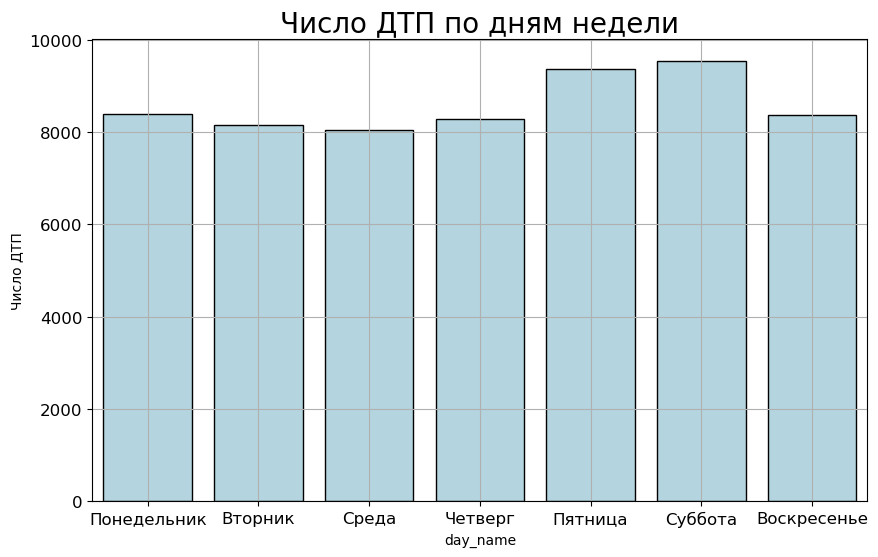

In [88]:
# Построение диаграммы
plt.figure(figsize=(10, 6))
ax=sns.barplot(x='day_name', y='id',data=grouped_days_df, order=days_order, edgecolor = 'black', color='lightblue')
plt.title('Число ДТП по дням недели', fontsize=20)
plt.ylabel('Число ДТП')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.grid()
plt.show()

- ДТП случаются чаще в субботу и пятницу (15,8 % и 15,6 % от общенедельного числа, соответственно)
- Реже всего по средам 13,4 %

#### Анализ числа ДТП в разрезе месяца

Создаем столбец с названием месяца

In [89]:
df_one['month_name']=df_one['datetime'].dt.month_name()

Группируем по месяцам и выводим число ДТП по каждому

In [90]:
df_one.groupby('month_name')['id'].nunique()

month_name
April        4047
August       6441
December     4896
February     3552
January      4323
July         6036
June         5775
March        3679
May          5181
November     4818
October      5446
September    5941
Name: id, dtype: int64

Переименовываем месяцы по русски

In [91]:
df_one['month_name']=df_one['month_name'].replace({
'April':     'Апрель',
'August':    'Август',
'December':  'Декабрь',
'February':  'Февраль',
'January':   'Январь',
'July':      'Июль',
'June':      'Июнь',
'March':     'Март',
'May':       'Май',
'November':  'Ноябоь',
'October':   'Октябрь',
'September': 'Сентябрь',
})

Создаем список для упорядочивания в нормальной последовательности

In [92]:
grouped_months_df = df_one.groupby('month_name')['id'].nunique().reset_index()
month_order = [
    'Январь', 
    'Февраль', 
    'Март', 
    'Апрель', 
    'Май', 
    'Июнь', 
    'Июль',
    'Август',
    'Сентябрь',
    'Октябрь',
    'Ноябоь',
    'Декабрь'
]

Выводим информацию о числе ДТП по месяцам в порядке убывания

In [93]:
df_month_dtp = pd.DataFrame({'Количество': df_one.groupby('month_name')['id'].nunique(), 
                      'Процент': round(df_one.groupby('month_name')['id'].nunique()/df_one.groupby('month_name')['id'].nunique().sum(), 3)*100})
df_month_dtp_sorted = df_month_dtp.sort_values(by='Процент', ascending=False).style.background_gradient(cmap='coolwarm')
df_month_dtp_sorted

,Количество,Процент
month_name,,
Август,6441,10.700000
Июль,6036,10.000000
Сентябрь,5941,9.900000
Июнь,5775,9.600000
Октябрь,5446,9.100000
Май,5181,8.600000
Декабрь,4896,8.100000
Ноябоь,4818,8.000000
Январь,4323,7.200000


Строим столбчатую диаграмму распределения числа ДТП по месяцам

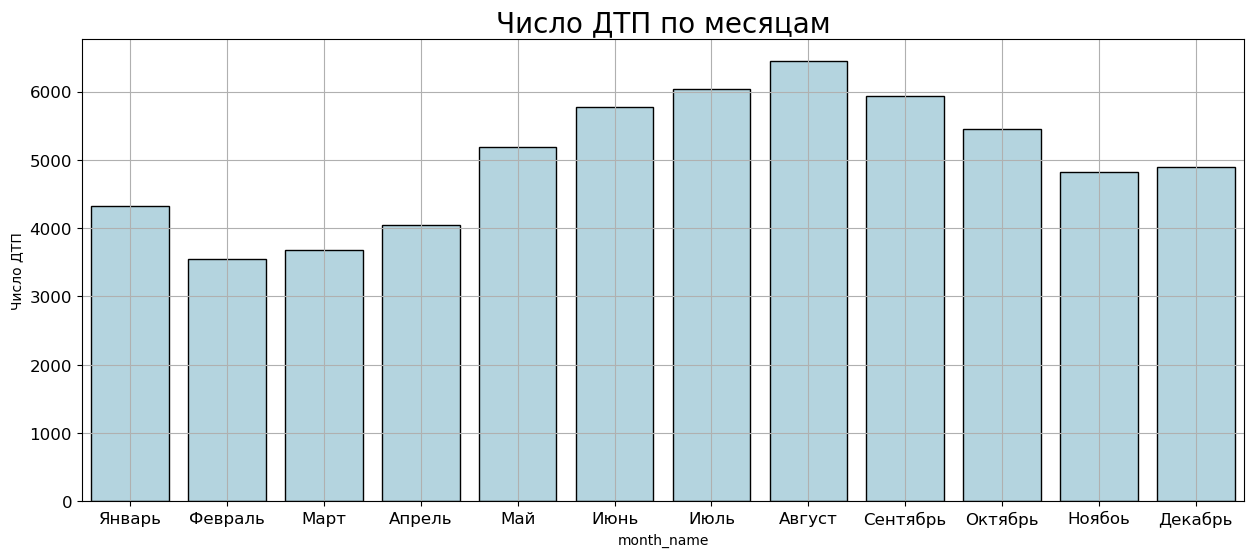

In [94]:
# Построение диаграммы
plt.figure(figsize=(15, 6))
ax=sns.barplot(x='month_name', y='id',data=grouped_months_df, order=month_order, color='lightblue', edgecolor = 'black')
plt.title('Число ДТП по месяцам', fontsize=20)
plt.ylabel('Число ДТП')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.grid()
plt.show()

- Маскимальное число случаев ДТП зарегистрировано в августе 10,7% от общегодового числа
- Минимум ДТП в феврале 5,9 %

### Категории водителей по стажу. Встречаются ли категории, которые разительно отличаются по числу ДТП

#### Предположим гипотезу, что пропуски в столбце years_of_driving_experience означают водителей с нулевым стажем

Для этого создадим столбец с нулевыми значениями стажа, так как нулевых значений в этом столбце нет

In [95]:
df_one['years_of_driving_experience'].value_counts()

years_of_driving_experience
1     3403
5     3185
10    3106
7     3047
3     2991
      ... 
65       5
66       4
67       2
63       2
69       2
Name: count, Length: 68, dtype: Int64

In [96]:
df_one['years_of_driving_experience_zero']=df_one['years_of_driving_experience'].fillna(0)

Выведем распределение числа ДТП от стажа водителя в порядке убывания

In [97]:

df_month_dtp_zero = pd.DataFrame({'Число ДТП': df_one.groupby('years_of_driving_experience_zero')['id'].nunique(),
                             'Процент': round(df_one.groupby('years_of_driving_experience_zero')['id'].nunique()/df_one.groupby('years_of_driving_experience_zero')['id'].nunique().sum(), 3)*100
                            }).head(10)
df_month_dtp_sorted_zero = df_month_dtp_zero.sort_values(by='Число ДТП', ascending=False).style.background_gradient(cmap='coolwarm')
df_month_dtp_sorted_zero

,Число ДТП,Процент
years_of_driving_experience_zero,,
0,34750,42.900000
1,2096,2.600000
5,1924,2.400000
3,1834,2.300000
7,1827,2.300000
8,1809,2.200000
6,1787,2.200000
4,1781,2.200000
2,1746,2.200000


- Предположительно 42,9 % ДТП случается с участием водителей без стажа вождения. Однако мы не можем однозначно связывать отсутствие данных с отсутствием стажа. К тому же такое высокое значение выходит далеко за пределы общей закономерности. Для проверки нужны дополнительные данные и исследования 

#### Анализ имеющихся данных

В дальнейшем мы ограничимся анализом имеющихся данных

Выведем распределение числа ДТП от стажа водителя в порядке убывания

In [98]:

df_month_dtp = pd.DataFrame({'Число ДТП': df_one.groupby('years_of_driving_experience')['id'].nunique(),
                             'Процент': round(df_one.groupby('years_of_driving_experience')['id'].nunique()/df_one.groupby('years_of_driving_experience_zero')['id'].nunique().sum(), 4)*100
                            }).head(15)
df_month_dtp_sorted = df_month_dtp.sort_values(by='Число ДТП', ascending=False).reset_index()
df_month_dtp_sorted['Order'] = range(1, len(df_month_dtp_sorted) + 1)
df_month_dtp_sorted = df_month_dtp_sorted.set_index('Order')
df_month_dtp_sorted=df_month_dtp_sorted.style.background_gradient(cmap='coolwarm')
df_month_dtp_sorted

,years_of_driving_experience,Число ДТП,Процент
Order,,,
1,1,2096,2.590000
2,5,1924,2.370000
3,10,1888,2.330000
4,3,1834,2.260000
5,7,1827,2.250000
6,8,1809,2.230000
7,6,1787,2.200000
8,4,1781,2.200000
9,2,1746,2.150000


- Водители с минимальным стажем 1 год имеют повышенный риск ДТП 2,6 %, что вполне очевидно ввиду неопытности.
- Однако интересно, что за ними следуют водители со стажем 5 (2,4%) и 10 (2,3%) лет, 
- а водители со стажем 2 года (2,15%) находятся на 9 месте по числу ДТП.

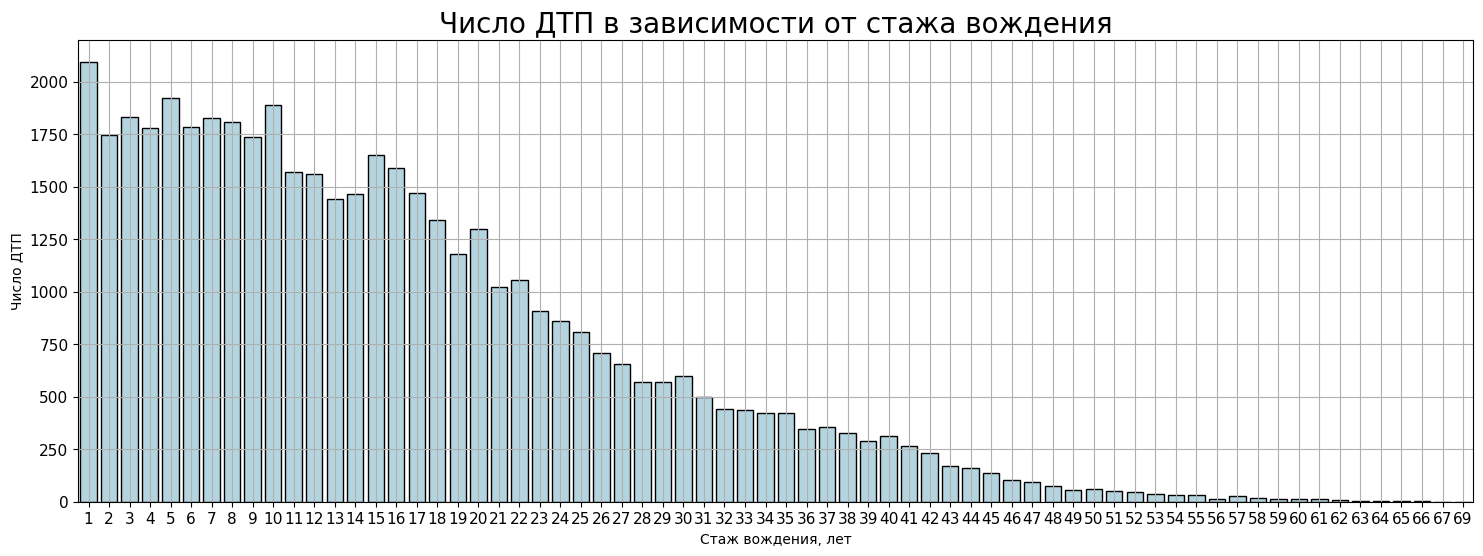

In [99]:
df_group=df_one.groupby('years_of_driving_experience')['id'].nunique().reset_index()
plt.figure(figsize=(18, 6))

ax=sns.barplot(x='years_of_driving_experience', y='id',data=df_group, color='lightblue', edgecolor = 'black')
plt.title('Число ДТП в зависимости от стажа вождения', fontsize=20)
plt.ylabel('Число ДТП')
plt.xlabel('Стаж вождения, лет')
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.grid()
plt.show()

- Диаграмма показывает, что в целом риск ДТП снижается с увеличением стажа вождения
- Нужно отметить также повышение риска ДТП при стаже 15-17 лет.

### Как менялось число аварий в Кировской (Киров входит в численность) и Московской области (Москва исключена). Где аварий больше в относительном выражении — в пересчёте на 100 тысяч жителей

#### Построим линейный график случаев ДТП с 2015 по 2024 годы для Кировской и Московской областей

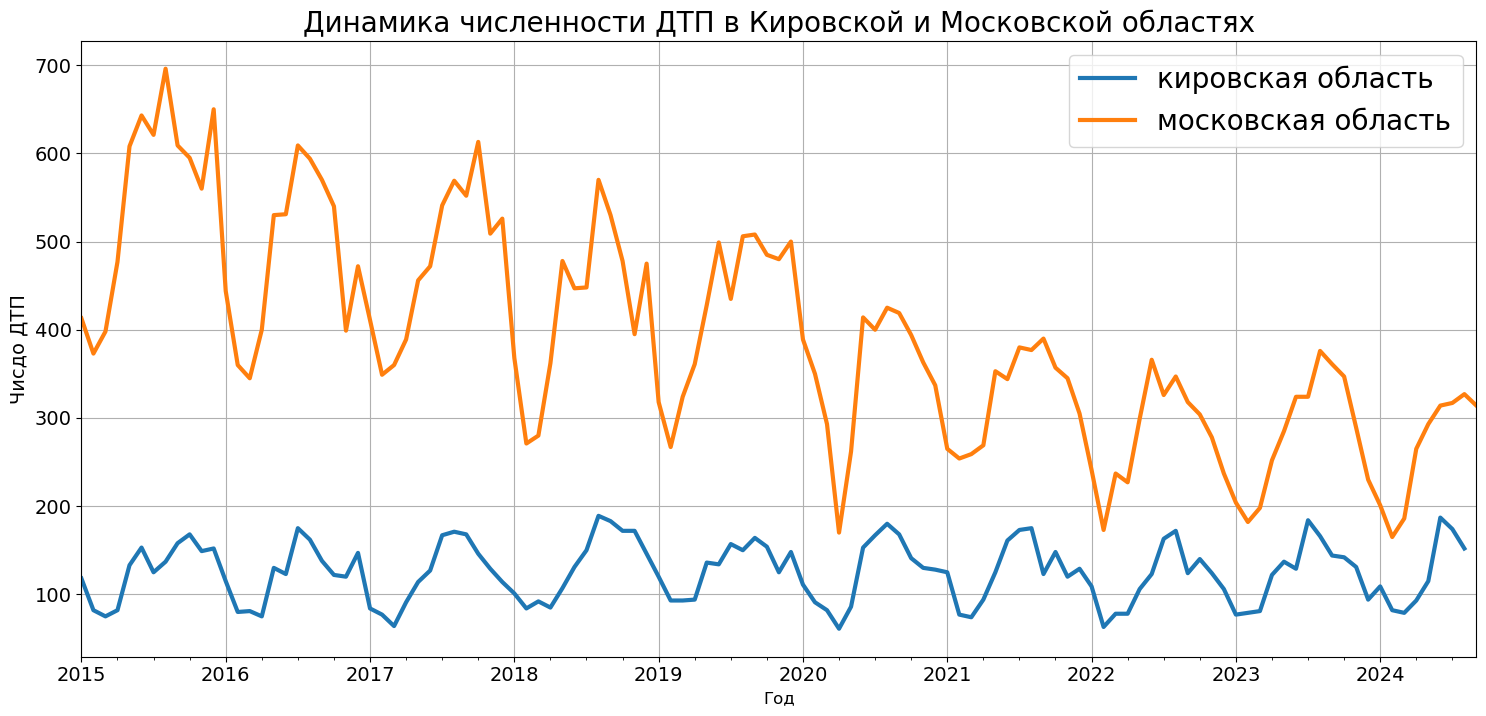

In [100]:

df_one['monthtime'] = df_one['datetime'].dt.to_period('M')
plt.figure(figsize=(18, 8))

for i in df_one['parent_region'].unique():
    df_one[df_one['parent_region']== i].groupby('monthtime')['id'].nunique().plot(
    kind='line', x= 'monthtime', y='id',alpha=1, label=f'{i}', linewidth = 3, legend=True
    )
plt.title('Динамика численности ДТП в Кировской и Московской областях', fontsize = 20)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Чисдо ДТП', fontsize=14)
plt.gca().tick_params(labelsize=14)
plt.legend(fontsize=20)
plt.grid()
plt.show()

- Оба графика имеют волнообразный характер, с максимумами в середине года (июль, август) и минимумами в начале года (февраль, март)
- Численность ДТП в Московской области имеет четкую тенденцию на уменьшение со временем в пределах исследуемого периода.

#### Подсчет относительного числа ДТП на 100 тысяч населения для Кировской и Московской области

In [101]:
#Создадим столбец в датафрейме с годом ДТП
df_one['year_ra']=df_one['datetime'].dt.year

Создадим сводный датасет по числу ДТП в год, в который добавим данные из открытых источников о численности населения в Кировской и Московской областях по каждому году 

In [102]:

df_per_year=pd.DataFrame({'год': df_one['year_ra'].unique(), 
                              'дтп в кировской': df_one[df_one['parent_region']== 'кировская область'].groupby('year_ra')['id'].nunique(),
                              'дтп в московской': df_one[df_one['parent_region']== 'московская область'].groupby('year_ra')['id'].nunique(), 
                             })
df_per_year=df_per_year.set_index('год').sort_values(by='год')
df_per_year['puputation_kir']=[1304348, 1297474, 1291684, 1283238, 1272109, 1262402, 1153680, 1149176, 1138112, 1129935]
df_per_year['puputation_msk']=[7231068, 7318647, 7423470, 7503385, 7599647, 7690863, 8524665, 8542257, 8591736, 8651260]

def calculate_per_100k(value, population):
    result=(value/population)*100000
    return result
df_per_year['kir_per100k']=df_per_year.apply(lambda x: calculate_per_100k(x['дтп в кировской'],x['puputation_kir']), axis=1)
df_per_year['msk_per100k']=df_per_year.apply(lambda x: calculate_per_100k(x['дтп в московской'],x['puputation_msk']), axis=1)

df_per_year = df_per_year.reset_index() 
df_per_year

,год,дтп в кировской,дтп в московской,puputation_kir,puputation_msk,kir_per100k,msk_per100k
0,2015,1568,5111,1304348,7231068,120.213317,70.681122
1,2016,1612,5102,1297474,7318647,124.241411,69.712339
2,2017,1532,6643,1291684,7423470,118.604860,89.486453
3,2018,1452,5747,1283238,7503385,113.151263,76.592098
4,2019,1468,5794,1272109,7599647,115.398916,76.240383
5,2020,1498,4216,1262402,7690863,118.662676,54.818295
6,2021,1524,3898,1153680,8524665,132.099022,45.726137
7,2022,1386,3353,1149176,8542257,120.608157,39.251921
8,2023,1486,3372,1138112,8591736,130.567115,39.247016
9,2024,991,2382,1129935,8651260,87.704160,27.533562


Построим столбчатую диаграмму для сравнения нормализованного числа ДТП в Кировской и Московской областях

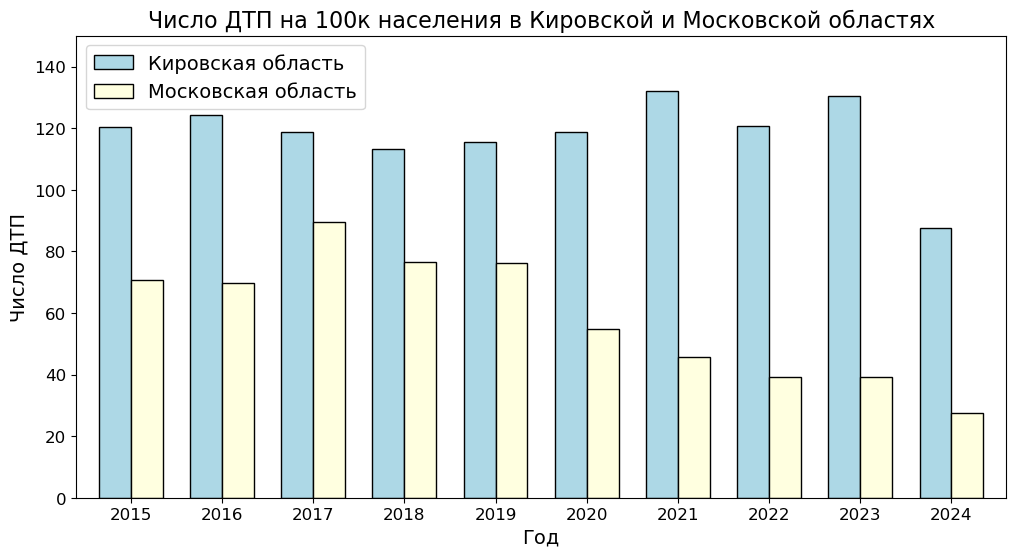

<function matplotlib.pyplot.show(close=None, block=None)>

In [103]:

df_per_year.plot(kind='bar', x='год', y=['kir_per100k', 'msk_per100k'], figsize=(12, 6), width=0.7, edgecolor='black', color=['lightblue','lightyellow'])
plt.title('Число ДТП на 100к населения в Кировской и Московской областях', fontsize=16)
plt.ylabel('Число ДТП', fontsize=14)
plt.xlabel('Год', fontsize=14)
plt.ylim(0,150)
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.legend(['Кировская область','Московская область'], fontsize=14)
plt.show()
plt.show

- По относительным значениям случаев ДТП на 100 тысяч населения Кировская область в среднем примерно в 2 раза превосходит Московскую область.
- Минимальное число ДТП в Московской (27,9 на 100000) и Кировской (86,2 на 100000) области в 2022 году
- Максимальное для Московской области в 2017 году (89,5 на 100000), а для Кировской в 2024 году (132,6 на 100000)

# Итоговые выводы


В ходе исследования проанализировали данные 6 датасетов, 3-х по Кировской области и 3-х по Московской. Данные включали информацию о дорожно-транспортных происшествиях, участниках и транспортных средствах. Данные были объединены в 3 датасета включающих Кировскую и Московскую области, быта проведена обработка пропусков и дубликатов, оптимизация типов данных и названий столбцов. В результате всю информацию собрали в единый датасет для дальнейшего анализа.

`Анализ числа ДТП в разрезе дня недели` выявил, что:
- ДТП случаются чаще в субботу и пятницу (15,8 % и 15,6 % от общенедельного числа, соответственно)
- Реже всего по средам 13,4 %


`Анализ числа ДТП по месяцам` показал:
- Маскимальное число случаев ДТП зарегистрировано в августе 10,7% от общегодового числа
- Минимум ДТП в феврале 5,9 %

В `исследовании зависимости числа ДТП от стажа вождения`: 
- Предположили гипотезу, что пропуски в столбце years_of_driving_experience означают водителей с нулевым стажем. Согласно этой гипотезе 42,9 % ДТП случается с участием водителей без стажа вождения. Однако мы не можем однозначно связывать отсутствие данных с отсутствием стажа. К тому же такое высокое значение выходит далеко за пределы общей закономерности. Для проверки данной гипотезы нужны дополнительные данные и исследования 
- Водители с минимальным стажем 1 год имеют повышенный риск ДТП 2,6 %, что вполне очевидно ввиду неопытности.
- Однако интересно, что за ними следуют водители со стажем 5 (2,4%) и 10 (2,3%) лет, 
- а водители со стажем 2 года (2,15%) находятся на 9 месте по числу ДТП.
- в целом риск ДТП снижается с увеличением стажа вождения
- Нужно отметить также повышение риска ДТП при стаже 15-17 лет.


`Анализ динамики численности ДТП в Кировской и Московской областях` 
- Количество ДТП имеют волнообразный характер, с максимумами в середине года (июль, август) и минимумами в начале года (февраль, март)
- Численность ДТП в Московской области имеет четкую тенденцию на уменьшение со временем в пределах исследуемого периода.
- По относительным значениям случаев ДТП на 100 тысяч населения Кировская область в среднем примерно в 2 раза превосходит Московскую область.
- Минимальное число ДТП в Московской (27,9 на 100000) и Кировской (86,2 на 100000) области в 2022 году
- Максимальное для Московской области в 2017 году (89,5 на 100000), а для Кировской в 2024 году (132,6 на 100000)

Повышенный риск случаев ДТП по субботам и пятницам, в августе и июле. В Кировской области, в отличие от Московской число ДТП не снижается со временем. Стоит обратить внимание на водителей со стажем 5 и 10 лет имеющих высокий риск ДТП.